In [3]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import cv2

In [5]:
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image #For loading insightface images

In [7]:
print(insightface.__version__)
print(np.__version__)

0.7.3
1.22.3


## Step 1. Detecting faces

https://github.com/deepinsight/insightface

![Alt text](image.png)

### Loading FaceAnalysis model

In [8]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))

download_path: C:\Users\macko/.insightface\models\buffalo_l


100%|██████████| 281857/281857 [00:15<00:00, 18327.52KB/s]


Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CUDAExecutionProvider': {'do_copy_in_default_stream': '1', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'device_id': '0', 'gpu_external_alloc': '0', 'enable_cuda_graph': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_free': '0', 'gpu_external_empty_cache': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'cudnn_conv_use_max_workspace': '1', 'cudnn_conv1d_pad_to_nc1d': '0', 'tunable_op_enable': '0', 'tunable_op_tuning_enable': '0', 'enable_skip_layer_norm_strict_mode': '0'}, 'CPUExecutionProvider': {}}
find model: C:\Users\macko/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CUDAExecutionProvider': {'do_copy_in_default_stream': '1', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'device_id': '0', 'gpu_external_alloc': '0', 'enable_cuda_graph': '0', 'gpu_mem_limit': '18446744073

In [ ]:
# From documentation https://github.com/deepinsight/insightface/blob/master/python-package/README.md

# Load example image from insightface and run face detection
img = ins_get_image('t1')
faces = app.get(img)
rimg = app.draw_on(img, faces)
cv2.imwrite("./t1_output.jpg", rimg) # Save output image

In [31]:
len(faces)

6

In [38]:
faces[0].keys() # Get keys of face dictionary

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])

In [39]:
faces[0]['bbox'] # Bounding box of the first face

array([466.08212, 268.61636, 573.58923, 415.5331 ], dtype=float32)

### Detecting first face in the image

(-0.5, 106.5, 146.5, -0.5)

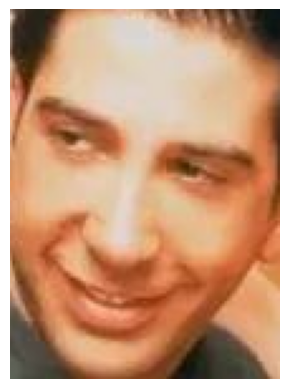

In [50]:
# plot each detected face next to each other
img = ins_get_image('t1')

# Extract the ROI from the image
x1, y1, x2, y2 = faces[0]['bbox']
roi = img[int(y1):int(y2), int(x1):int(x2),::-1] # last part ,::-1 is to convert BGR to RGB - to show colors

# Create a new figure and display the ROI
plt.imshow(roi)
plt.axis('off')  # Turn off axis labels
# plt.show()

### Detecting all faces in the image

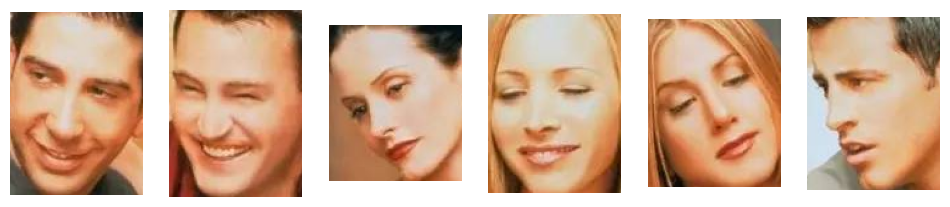

In [54]:
# plot each detected face next to each other
img = ins_get_image('t1')
fig, axs = plt.subplots(1,6, figsize=(12, 5))

# Loop through the faces and plot them
for i, face in enumerate(faces):
    x1, y1, x2, y2 = face['bbox']
    roi = img[int(y1):int(y2), int(x1):int(x2), ::-1]  # Convert BGR to RGB

    # Select the current subplot
    ax = axs[i]

    # Display the ROI in the current subplot
    ax.imshow(roi)
    ax.axis('off')  # Turn off axis labels

plt.show()  # Display the subplots

### Loading my own images

(-0.5, 480.5, 633.5, -0.5)

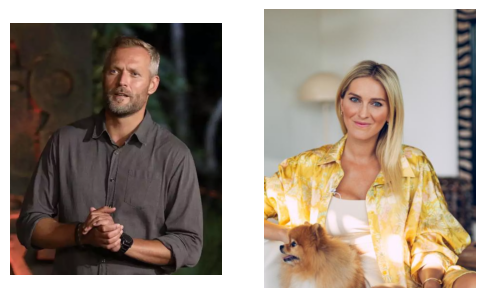

In [63]:
fig, axs = plt.subplots(1,2, figsize=(6, 4))
# Load image from file
surviv = cv2.imread('surviv.png')
axs[0].imshow(surviv[:,:,::-1])
loveis = cv2.imread('loveis.png')
axs[1].imshow(loveis[:,:,::-1])

axs[0].axis('off')  # Turn off axis labels
axs[1].axis('off')  # Turn off axis labels

### Running face detection on my own images and showing result

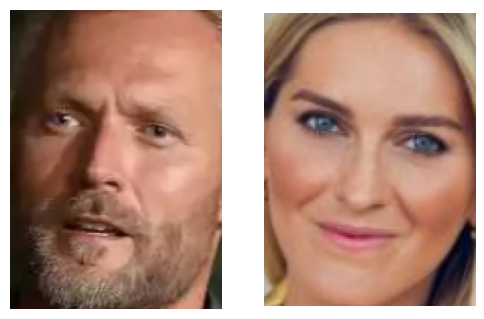

In [57]:
face_surviv = app.get(surviv)

face_loveis = app.get(loveis)

# plot each detected face next to each other
fig, axs = plt.subplots(1,2, figsize=(6, 4))

x1, y1, x2, y2 = face_surviv[0]['bbox']
roi1 = surviv[int(y1):int(y2), int(x1):int(x2),::-1] # last part ,::-1 is to convert BGR to RGB - to show colors

x1, y1, x2, y2 = face_loveis[0]['bbox']
roi2 = loveis[int(y1):int(y2), int(x1):int(x2),::-1] # last part ,::-1 is to convert BGR to RGB - to show colors

# Create a new figure and display the ROI
axs[0].imshow(roi1)
axs[0].axis('off')  # Turn off axis labels
axs[1].imshow(roi2)
axs[1].axis('off')  # Turn off axis labels
plt.show()

## Step 2. Face swapping

In [15]:
# Face swapping
# Swapper downloaded from: https://www.reddit.com/r/midjourney/comments/13pnraj/please_reupload_inswapper_128onnx/
swapper = insightface.model_zoo.get_model('inswapper_128.onnx',
                                          download=False,
                                          download_zip=False)

Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CUDAExecutionProvider': {'do_copy_in_default_stream': '1', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'device_id': '0', 'gpu_external_alloc': '0', 'enable_cuda_graph': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_free': '0', 'gpu_external_empty_cache': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'cudnn_conv_use_max_workspace': '1', 'cudnn_conv1d_pad_to_nc1d': '0', 'tunable_op_enable': '0', 'tunable_op_tuning_enable': '0', 'enable_skip_layer_norm_strict_mode': '0'}, 'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


### Swap friends faces with loveis face

(-0.5, 103.5, 143.5, -0.5)

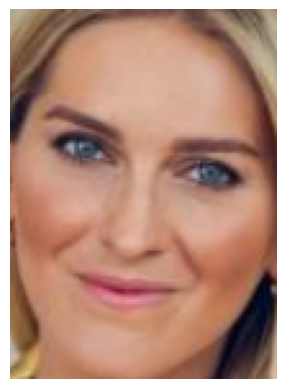

In [66]:
plt.imshow(roi2)
plt.axis('off')  # Turn off axis labels

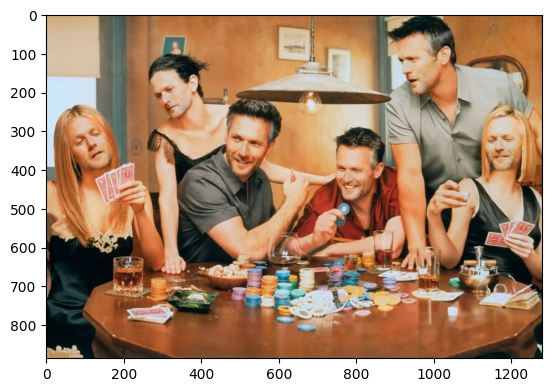

In [102]:
face_loveis[0]

img_copy = img.copy()

for face in faces:
    img_copy = swapper.get(img_copy, face, face_surviv[0], paste_back=True)

plt.imshow(img_copy[:,:,::-1])

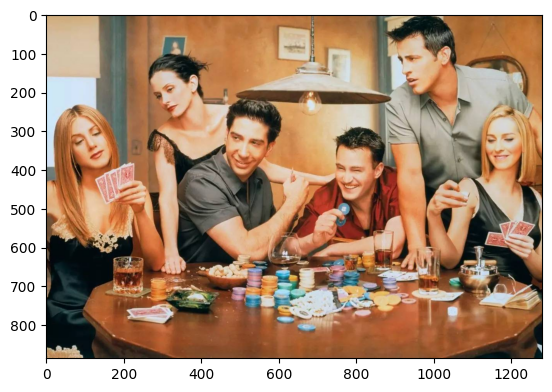

In [111]:
# Swap just the second face from faces list
img_copy = img.copy()

img_copy = swapper.get(img_copy, faces[3], face_loveis[0], paste_back=True)

plt.imshow(img_copy[:,:,::-1])

In [26]:
def swap_n_show(img1_fn,
                img2_fn,
                app,
                swapper,
                plot_before=True,
                plot_after=True):
    """
    Uses face swapper to swap faces in two images.
    """

    img1 = cv2.imread(img1_fn)
    img2 = cv2.imread(img2_fn)

    if plot_before:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1[:,:,::-1])
        axs[0].axis("off")
        axs[1].imshow(img2[:,:,::-1])
        axs[1].axis("off")
        plt.show()

    face1 = app.get(img1)[0]
    face2 = app.get(img2)[0]

    img1_ = img1.copy()
    img2_ = img2.copy()
    if plot_after:
        img1_ = swapper.get(img1_, face1, face2, paste_back=True)
        img2_ = swapper.get(img2_, face2, face1, paste_back=True)
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1_[:,:,::-1])
        axs[0].axis("off")
        axs[1].imshow(img2_[:,:,::-1])
        axs[1].axis("off")
        plt.show() 
    return img1_, img2_

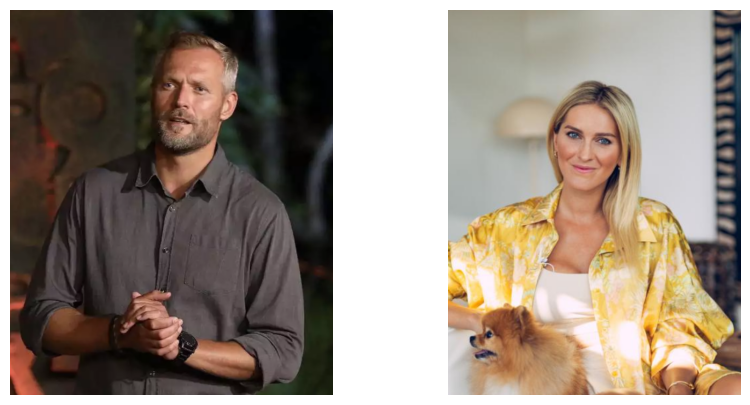

C:\Users\macko\AppData\Roaming\Python\Python310\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


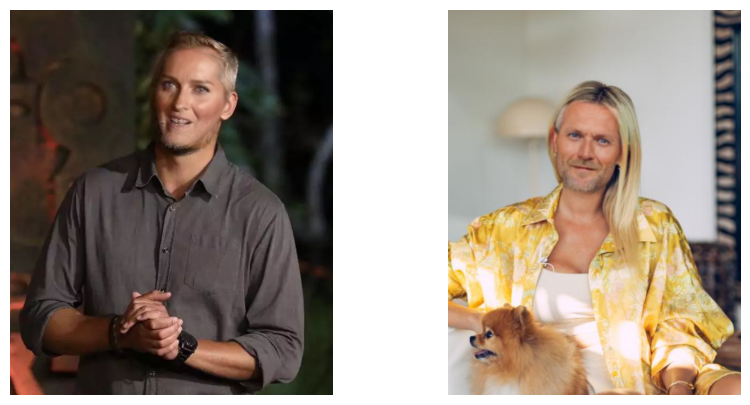

(array([[[24, 38, 56],
         [24, 38, 56],
         [24, 38, 56],
         ...,
         [25, 21, 19],
         [28, 24, 23],
         [36, 30, 29]],
 
        [[24, 38, 56],
         [24, 38, 56],
         [24, 38, 56],
         ...,
         [23, 19, 17],
         [26, 21, 19],
         [32, 25, 24]],
 
        [[24, 38, 56],
         [24, 38, 56],
         [24, 38, 56],
         ...,
         [21, 17, 16],
         [23, 19, 17],
         [27, 20, 19]],
 
        ...,
 
        [[29, 40, 67],
         [26, 37, 65],
         [21, 34, 62],
         ...,
         [13, 31, 24],
         [13, 31, 24],
         [14, 32, 25]],
 
        [[27, 39, 66],
         [25, 36, 64],
         [21, 34, 62],
         ...,
         [13, 31, 24],
         [13, 31, 24],
         [14, 32, 25]],
 
        [[27, 38, 66],
         [24, 36, 64],
         [19, 33, 60],
         ...,
         [13, 31, 24],
         [13, 31, 24],
         [14, 32, 25]]], dtype=uint8),
 array([[[128, 146, 153],
         [127, 1

In [27]:
swap_n_show('surviv.png', 'loveis.png', app, swapper)